This notebook was meant to contain the graphs to be used for the presentation of the 3 July 2023, with people from the sub project from Gorongosa.

Plots to do, with only temperature and precipitation for the moment:

>Compare historic observed v historic model​

>Compare WB v downscaled/bc data​

>Create overview of trends (monthly, annual evolution)​

>Compare historic model v historic projection​ (some analysis require separation of SSPs / model uncertainty)

>Taste of indicators:​

>SSP3: days above 40C (over time)​

>100yr precipitation​

In [1]:
emplacement_of_int = 'Gorongosa'

In [2]:
# packages
import pandas as pd
import numpy as np
import os
import os.path
import seaborn as sns
import matplotlib
import geopy.distance
from matplotlib import pyplot as plt

In [3]:
# functions

def import_treat_modeled_NEX_GDDP_CMIP6(climate_var, unit):
    # import data
    
    path_NEX_GDDP_CMIP6_EmplacementStation=os.path.join(r'\\COWI.net\projects\A245000\A248363\CRVA\Datasets\NEX-GDDP-CMIP6-AllMoz\csv_file',climate_var,climate_var+'_'+unit+'_day_1980-2060',climate_var+'_1980-2060_projectsMoz_wrong_emplacement.csv')
    
    data_NEX_GDDP_CMIP6_EmplacementStation = pd.read_csv(path_NEX_GDDP_CMIP6_EmplacementStation)
    
    data_NEX_GDDP_CMIP6_EmplacementStation = add_year_month_season(data_NEX_GDDP_CMIP6_EmplacementStation,'Date')
    
    return data_NEX_GDDP_CMIP6_EmplacementStation

In [4]:
def add_year_month_season(df,column_date):
    # add Year, month and season columns for graphs
    Year = df[[column_date]].values.reshape(len(df[[column_date]].values),)
    Month = df[[column_date]].values.reshape(len(df[[column_date]].values),)
    Season = df[[column_date]].values.reshape(len(df[[column_date]].values),)
    
    if str(Year[1]).find('-')==2:
        for i in np.arange(0,len(df[[column_date]].values)):
            Year[i]=int(Year[i][6:10])
            Month[i]=int(Month[i][3:5])
            if Month[i]>3 and Month[i]<10: # dry season in Mozambique is between April and September
                Season[i]='Dry'
            else:# humid season is between October and March
                Season[i]='Humid'
            
            Month[i]=str_month(Month[i])
            
    if str(Year[1]).find('-')==4:
        for i in np.arange(0,len(df[[column_date]].values)):
            Year[i]=int(Year[i][0:4])
            Month[i]=int(Month[i][5:7])
            if Month[i]>3 and Month[i]<10: # dry season in Mozambique is between April and September
                Season[i]='Dry'
            else:# humid season is between October and March
                Season[i]='Humid'
            
            Month[i]=str_month(Month[i])
                
    df['Year'] = Year
    df['Month'] = Month
    df['Season'] = Season
    return df

In [5]:
def str_month(int_m):
    if int_m==1:
        str_m = 'Jan'
    if int_m==2:
        str_m = 'Feb'    
    if int_m==3:
        str_m = 'Mar'
    if int_m==4:
        str_m = 'Apr'
    if int_m==5:
        str_m = 'May'
    if int_m==6:
        str_m = 'Jun'
    if int_m==7:
        str_m = 'Jul'
    if int_m==8:
        str_m = 'Aug'    
    if int_m==9:
        str_m = 'Sep'
    if int_m==10:
        str_m = 'Oct'
    if int_m==11:
        str_m = 'Nov'
    if int_m==12:
        str_m = 'Dec'
    return str_m

In [105]:
# this function is meant to find which meteo stations are the closest to the projects of interest
# find which stations are of interest, which one are the closest to the coordinates of the projects
def find_closest_meteo_station_to_projects(data_obs_NOAA,name_projects,lat_projects,lon_projects):
    # save in a dataframe name, latitudes and longitudes informations for each station
    df_station_NOAA=data_obs_NOAA.loc[:, ["NAME", "LATITUDE","LONGITUDE"]]
    df_station_NOAA.drop_duplicates(inplace = True) # drop duplicates to only have name of the towns and latitudes and longitudes
    df_station_NOAA.reset_index(drop=True,inplace = True)  # drop = true avoids to keep the former index
    # inplace = True modifies the original dataframe
    
    name_closest_station_to_project = [] # create an empty list to contain the name of the closest station to each project
    index_closest_station_to_project = []
    for (i,name_project) in zip(np.arange(0,len(name_projects)),name_projects):
        # calculate difference between the different coordinates
        df_station_NOAA['Diff latitude project '+str(i)] = abs(abs(df_station_NOAA['LATITUDE']) - abs(lat_projects[i]))
        df_station_NOAA['Diff longitude project '+str(i)] = abs(abs(df_station_NOAA['LONGITUDE']) - abs(lon_projects[i]))
        df_station_NOAA['Diff coordinates project '+str(i)] = df_station_NOAA['Diff latitude project '+str(i)]+df_station_NOAA['Diff longitude project '+str(i)]
        # register the name of the stations that are the closest to the projects and the index in df_station_NOAA corresponding to those closest stations
        name_closest_station = df_station_NOAA['NAME'].iloc[np.where(df_station_NOAA['Diff coordinates project '+str(i)]==min(df_station_NOAA['Diff coordinates project '+str(i)]))[0][0]]
        name_closest_station_to_project.append(name_closest_station)
        index_closest_station_to_project.append(np.where(df_station_NOAA['Diff coordinates project '+str(i)]==min(df_station_NOAA['Diff coordinates project '+str(i)]))[0][0])
        print('The closest meteorological station to the project '+name_project+' is the one located in '+name_closest_station)

        #coords_1 = (df_station_NOAA['LATITUDE'][index_closest_station_to_project], df_station_NOAA['LONGITUDE'][index_closest_station_to_project])
        #coords_2 = (lat_projects[i], lon_projects[i])
        #str_dist = str(geopy.distance.geodesic(coords_1, coords_2).km)
        #print('The distance between the station '+ df_station_NOAA['NAME'][index_closest_station_to_project] +' and the emplacement of interest '+name_projects[i]+' is '+str_dist+ ' km.')

    # take off the duplicates from the list of name of station which are the closest to our projects and the indexes in the dataframe of those corresponding stations
    name_closest_station_to_project_without_duplicates=list(set(name_closest_station_to_project))
    index_closest_station_to_project_without_duplicates=list(set(index_closest_station_to_project))
    print('\n')
    print('The coordinates for the meteorological stations which are the closest to the project of interest are :')
    print('\n')
    for k in np.arange(len(index_closest_station_to_project_without_duplicates)):
        print('Name '+df_station_NOAA['NAME'][index_closest_station_to_project_without_duplicates[k]])
        print('Longitude '+str(df_station_NOAA['LONGITUDE'][index_closest_station_to_project_without_duplicates[k]]))
        print('Latitude '+str(df_station_NOAA['LATITUDE'][index_closest_station_to_project_without_duplicates[k]]))
        print('\n')

In [106]:
coords_1 = (2,3)
coords_2 = (4,5)
str(geopy.distance.geodesic(coords_1, coords_2).km)

'313.5883972125955'

# Import data

## Observations data
precipitation: NOAA, gorongosa

temperature: NOAA

### Precipitation: NOAA

In [8]:
path = r'C:\Users\CLMRX\COWI\A248363 - Climate analysis - Documents\General\CRVA_tool\Master_thesis\Project\3 - Implementation\1 - Data\1-BC\NOAA-ClimateDataOnline\3370204.csv'
daily_sum_obs_from_NOAA = pd.read_csv(path)

In [9]:
# find closest station to the station of interest
name_projects_data = np.array(['Gorongosa'])
name_projects = pd.Series(name_projects_data)

lon_projects_data = np.array([34.07824286310398])
lon_projects = pd.Series(lon_projects_data)

lat_projects_data = np.array([-18.68063728746643])
lat_projects = pd.Series(lat_projects_data)

#find_closest_meteo_station_to_projects(daily_sum_obs_from_NOAA,name_projects,lat_projects,lon_projects)

The closest meteorological station to the project Gorongosa is the one located in CHIMOIO, MZ


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [10]:
daily_sum_obs_from_NOAA_gorongosa = daily_sum_obs_from_NOAA[daily_sum_obs_from_NOAA['NAME']=='CHIMOIO, MZ']
daily_sum_obs_from_NOAA_gorongosa = add_year_month_season(daily_sum_obs_from_NOAA_gorongosa,'DATE')
daily_sum_obs_from_NOAA_gorongosa

C:\Users\CLMRX\AppData\Local\Temp\1\ipykernel_16504\2835294180.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = Year
C:\Users\CLMRX\AppData\Local\Temp\1\ipykernel_16504\2835294180.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month'] = Month
C:\Users\CLMRX\AppData\Local\Temp\1\ipykernel_16504\2835294180.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP,PRCP_ATTRIBUTES,TAVG,TAVG_ATTRIBUTES,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES,Year,Month,Season
3019,MZ000067295,"CHIMOIO, MZ",-19.117,33.467,732.0,1970-01-01,0.4,",,Q",NaN,NaN,30.0,",,Q",20.7,",,Q",1970,Jan,Humid
3020,MZ000067295,"CHIMOIO, MZ",-19.117,33.467,732.0,1970-01-02,0.0,",,Q",NaN,NaN,30.5,",,Q",21.2,",,Q",1970,Jan,Humid
3021,MZ000067295,"CHIMOIO, MZ",-19.117,33.467,732.0,1970-01-03,0.0,",,Q",NaN,NaN,28.7,",,Q",20.5,",,Q",1970,Jan,Humid
3022,MZ000067295,"CHIMOIO, MZ",-19.117,33.467,732.0,1970-01-04,0.0,",,Q",NaN,NaN,28.8,",,Q",19.2,",,Q",1970,Jan,Humid
3023,MZ000067295,"CHIMOIO, MZ",-19.117,33.467,732.0,1970-01-05,0.0,",,Q",NaN,NaN,30.1,",,Q",20.2,",,Q",1970,Jan,Humid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16615,MZ000067295,"CHIMOIO, MZ",-19.117,33.467,732.0,2020-12-27,NaN,NaN,25.3,"H,,S",NaN,NaN,21.2,",,S",2020,Dec,Humid
16616,MZ000067295,"CHIMOIO, MZ",-19.117,33.467,732.0,2020-12-28,NaN,NaN,26.4,"H,,S",NaN,NaN,21.3,",,S",2020,Dec,Humid
16617,MZ000067295,"CHIMOIO, MZ",-19.117,33.467,732.0,2020-12-29,NaN,NaN,25.9,"H,,S",NaN,NaN,NaN,NaN,2020,Dec,Humid
16618,MZ000067295,"CHIMOIO, MZ",-19.117,33.467,732.0,2020-12-30,7.1,",,S",22.8,"H,,S",NaN,NaN,21.0,",,S",2020,Dec,Humid


In [11]:
daily_sum_obs_from_NOAA_gorongosa

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP,PRCP_ATTRIBUTES,TAVG,TAVG_ATTRIBUTES,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES,Year,Month,Season
3019,MZ000067295,"CHIMOIO, MZ",-19.117,33.467,732.0,1970-01-01,0.4,",,Q",NaN,NaN,30.0,",,Q",20.7,",,Q",1970,Jan,Humid
3020,MZ000067295,"CHIMOIO, MZ",-19.117,33.467,732.0,1970-01-02,0.0,",,Q",NaN,NaN,30.5,",,Q",21.2,",,Q",1970,Jan,Humid
3021,MZ000067295,"CHIMOIO, MZ",-19.117,33.467,732.0,1970-01-03,0.0,",,Q",NaN,NaN,28.7,",,Q",20.5,",,Q",1970,Jan,Humid
3022,MZ000067295,"CHIMOIO, MZ",-19.117,33.467,732.0,1970-01-04,0.0,",,Q",NaN,NaN,28.8,",,Q",19.2,",,Q",1970,Jan,Humid
3023,MZ000067295,"CHIMOIO, MZ",-19.117,33.467,732.0,1970-01-05,0.0,",,Q",NaN,NaN,30.1,",,Q",20.2,",,Q",1970,Jan,Humid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16615,MZ000067295,"CHIMOIO, MZ",-19.117,33.467,732.0,2020-12-27,NaN,NaN,25.3,"H,,S",NaN,NaN,21.2,",,S",2020,Dec,Humid
16616,MZ000067295,"CHIMOIO, MZ",-19.117,33.467,732.0,2020-12-28,NaN,NaN,26.4,"H,,S",NaN,NaN,21.3,",,S",2020,Dec,Humid
16617,MZ000067295,"CHIMOIO, MZ",-19.117,33.467,732.0,2020-12-29,NaN,NaN,25.9,"H,,S",NaN,NaN,NaN,NaN,2020,Dec,Humid
16618,MZ000067295,"CHIMOIO, MZ",-19.117,33.467,732.0,2020-12-30,7.1,",,S",22.8,"H,,S",NaN,NaN,21.0,",,S",2020,Dec,Humid


### Precipitation : observation from Gorongosa

Observation precipitation data given by André Görgens (Cosnultant, Water resources Management, Zutari) in an email, on the 20th of June 2023.

In [12]:
path = r'C:\Users\CLMRX\COWI\A248363 - Climate analysis - Documents\General\CRVA_tool\Master_thesis\Project\3 - Implementation\1 - Data\1-BC\DirecltyfromMoz\Precipitation_Gorongosa_reformat.csv'
pr_obs_gorongosa_from_gorongosa = pd.read_csv(path)

In [124]:
pr_obs_gorongosa_from_gorongosa

,time,pr
0,1980-01-01,NaN
1,1980-01-02,NaN
2,1980-01-03,NaN
3,1980-01-04,NaN
4,1980-01-05,NaN
...,...,...
14971,2020-12-27,2.7
14972,2020-12-28,0
14973,2020-12-29,0
14974,2020-12-30,138.4


## Modeled data
precipitation :  WB, NEX GDDP CMIP6, (copernicus)

temperature : WB, NEX GDDP CMIP6, (Copernicus)

### Precipitation NEX GDDP CMIP6

In [14]:
# at the emplacement of our sub projects
path = r'\\COWI.net\projects\A245000\A248363\CRVA\Datasets\NEX-GDDP-CMIP6-AllMoz\csv_file\pr\pr_mm_per_day_day_1980-2060\pr_1980-2060_projectsMoz_wrong_emplacement.csv'
pr_wrong_modeled_NEXGDDPCMIP6 = import_treat_modeled_NEX_GDDP_CMIP6('pr', 'mm_per_day')
pr_wrong_historic_modeled_NEXGDDPCMIP6 = pr_wrong_modeled_NEXGDDPCMIP6[pr_wrong_modeled_NEXGDDPCMIP6['Experiment']=='historical']
pr_wrong_future_modeled_NEXGDDPCMIP6 = pr_wrong_modeled_NEXGDDPCMIP6[pr_wrong_modeled_NEXGDDPCMIP6['Experiment']!='historical']
pr_futur_model_NEXGDDPCMIP6_gorongosa=pr_wrong_future_modeled_NEXGDDPCMIP6[pr_wrong_future_modeled_NEXGDDPCMIP6['Name project']=='Gorongosa_EIB']

In [15]:
pr_wrong_future_modeled_NEXGDDPCMIP6[pr_wrong_future_modeled_NEXGDDPCMIP6['Name project']=='Gorongosa_EIB']

,Name project,Experiment,Model,Latitude,Longitude,Date,Mean of the daily precipitation rate mm/day,Year,Month,Season
1391640,Gorongosa_EIB,ssp245,ACCESS-CM2,-18.375,34.125,01-01-2015,8.803216,2015,Jan,Humid
1391641,Gorongosa_EIB,ssp245,ACCESS-CM2,-18.375,34.125,02-01-2015,0.000000,2015,Jan,Humid
1391642,Gorongosa_EIB,ssp245,ACCESS-CM2,-18.375,34.125,03-01-2015,0.000000,2015,Jan,Humid
1391643,Gorongosa_EIB,ssp245,ACCESS-CM2,-18.375,34.125,04-01-2015,6.263219,2015,Jan,Humid
1391644,Gorongosa_EIB,ssp245,ACCESS-CM2,-18.375,34.125,05-01-2015,24.522091,2015,Jan,Humid
...,...,...,...,...,...,...,...,...,...,...
2399755,Gorongosa_EIB,ssp370,TaiESM1,-18.375,34.125,27-12-2060,0.000000,2060,Dec,Humid
2399756,Gorongosa_EIB,ssp370,TaiESM1,-18.375,34.125,28-12-2060,0.000000,2060,Dec,Humid
2399757,Gorongosa_EIB,ssp370,TaiESM1,-18.375,34.125,29-12-2060,0.000000,2060,Dec,Humid
2399758,Gorongosa_EIB,ssp370,TaiESM1,-18.375,34.125,30-12-2060,0.033374,2060,Dec,Humid


In [16]:
# to compare with NOAA observation data
path = r'\\COWI.net\projects\A245000\A248363\CRVA\Datasets\NEX-GDDP-CMIP6-AllMoz\csv_file\pr\pr_mm_per_day_day_1970-2014_CLosest_to_NOAA\NEXGDDPCMIP6_at_same_emplacement_as_NOAA_stationPembaChimoioBeira_pr_1970-2014_projectsMoz.csv'
pr_model_NEX_GDDPCMIP6_to_comp_NOAA = pd.read_csv(path)
pr_model_NEX_GDDPCMIP6_to_comp_NOAA_gorongosa = pr_model_NEX_GDDPCMIP6_to_comp_NOAA[pr_model_NEX_GDDPCMIP6_to_comp_NOAA['Name station']=='CHIMOIO, MZ']

### Temperature NEX-GDDP-CMIP6

In [17]:
# at the emplacement of our sub projects
path = r'\\COWI.net\projects\A245000\A248363\CRVA\Datasets\NEX-GDDP-CMIP6-AllMoz\csv_file\tas\tas_Celsius_day_1950-2100\tas_1950-2100_projectsMoz_wrong_emplacement.csv'
tas_wrong_modeled_NEXGDDPCMIP6 = import_treat_modeled_NEX_GDDP_CMIP6('tas', 'Celsius')
tas_wrong_historic_modeled_NEXGDDPCMIP6 = tas_wrong_modeled_NEXGDDPCMIP6[tas_wrong_modeled_NEXGDDPCMIP6['Experiment']=='historical']
tas_wrong_future_modeled_NEXGDDPCMIP6 = tas_wrong_modeled_NEXGDDPCMIP6[tas_wrong_modeled_NEXGDDPCMIP6['Experiment']!='historical']

In [18]:
# to compare with NOAA observation data
path = r'\\COWI.net\projects\A245000\A248363\CRVA\Datasets\NEX-GDDP-CMIP6-AllMoz\csv_file\tas\tas_Celsius_day_1970-2014_closest_point_to_NOAA\NEXGDDPCMIP6_at_same_emplacement_as_NOAA_stationPembaChimoioBeira_tas_1970-2014_projectsMoz.csv'
tas_model_NEX_GDDPCMIP6_to_comp_NOAA = pd.read_csv(path)
tas_model_NEX_GDDPCMIP6_to_comp_NOAA_gorongosa = tas_model_NEX_GDDPCMIP6_to_comp_NOAA[tas_model_NEX_GDDPCMIP6_to_comp_NOAA['Name station']=='CHIMOIO, MZ']
tas_model_NEX_GDDPCMIP6_to_comp_NOAA_gorongosa

,Name station,Experiment,Model,Latitude,Longitude,Date,Daily Near-Surface Air Temperature °C
246540,"CHIMOIO, MZ",historical,ACCESS-CM2,-19.125,33.375,01-01-1970,24.518219
246541,"CHIMOIO, MZ",historical,ACCESS-CM2,-19.125,33.375,02-01-1970,24.295807
246542,"CHIMOIO, MZ",historical,ACCESS-CM2,-19.125,33.375,03-01-1970,25.548065
246543,"CHIMOIO, MZ",historical,ACCESS-CM2,-19.125,33.375,04-01-1970,25.847076
246544,"CHIMOIO, MZ",historical,ACCESS-CM2,-19.125,33.375,05-01-1970,25.315582
...,...,...,...,...,...,...,...
493075,"CHIMOIO, MZ",historical,TaiESM1,-19.125,33.375,27-12-2014,32.344208
493076,"CHIMOIO, MZ",historical,TaiESM1,-19.125,33.375,28-12-2014,31.671448
493077,"CHIMOIO, MZ",historical,TaiESM1,-19.125,33.375,29-12-2014,32.279205
493078,"CHIMOIO, MZ",historical,TaiESM1,-19.125,33.375,30-12-2014,34.464386


# Compare historic observed vs historic model

In [19]:
# deja fait, reproduire ce qui a ete fait sans seaborn

In [117]:
tas_wrong_historic_modeled_NEXGDDPCMIP6_gorongosa=tas_wrong_historic_modeled_NEXGDDPCMIP6[tas_wrong_historic_modeled_NEXGDDPCMIP6['Name project']=='Gorongosa_EIB'].drop('Name project',axis=1)
tas_wrong_historic_modeled_NEXGDDPCMIP6_gorongosa=add_year_month_season(tas_wrong_historic_modeled_NEXGDDPCMIP6_gorongosa,'Date')
tas_wrong_historic_modeled_NEXGDDPCMIP6_gorongosa

,Experiment,Model,Latitude,Longitude,Date,Daily Near-Surface Air Temperature °C,Year,Month,Season
1199880,historical,ACCESS-CM2,-18.375,34.125,01-01-1980,20.263672,1980,Jan,Humid
1199881,historical,ACCESS-CM2,-18.375,34.125,02-01-1980,21.731964,1980,Jan,Humid
1199882,historical,ACCESS-CM2,-18.375,34.125,03-01-1980,23.354279,1980,Jan,Humid
1199883,historical,ACCESS-CM2,-18.375,34.125,04-01-1980,22.431549,1980,Jan,Humid
1199884,historical,ACCESS-CM2,-18.375,34.125,05-01-1980,21.943329,1980,Jan,Humid
...,...,...,...,...,...,...,...,...,...
1391635,historical,TaiESM1,-18.375,34.125,27-12-2014,30.252838,2014,Dec,Humid
1391636,historical,TaiESM1,-18.375,34.125,28-12-2014,31.666138,2014,Dec,Humid
1391637,historical,TaiESM1,-18.375,34.125,29-12-2014,31.964783,2014,Dec,Humid
1391638,historical,TaiESM1,-18.375,34.125,30-12-2014,32.038147,2014,Dec,Humid


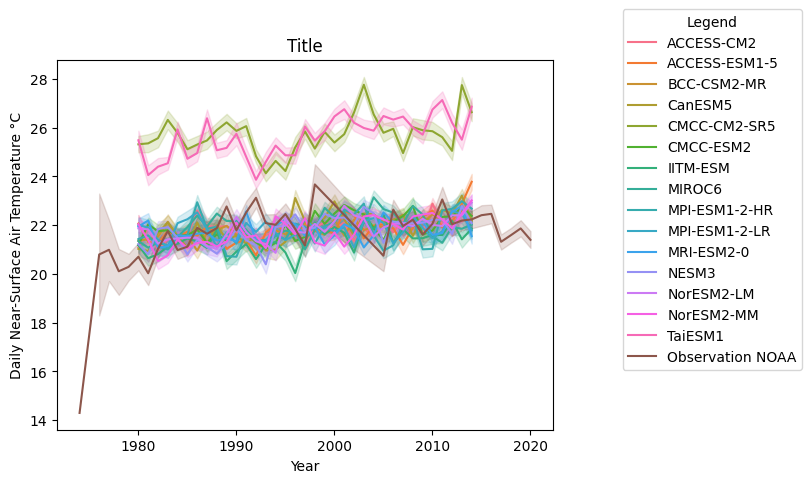

In [123]:
fig,ax=plt.subplots()
sns.lineplot(data=tas_wrong_historic_modeled_NEXGDDPCMIP6_gorongosa,x='Year', y='Daily Near-Surface Air Temperature °C',hue='Model',ax=ax)
sns.lineplot(data=daily_sum_obs_from_NOAA_gorongosa,x='Year', y='TAVG',label='Observation NOAA',ax=ax)

# display the legend
handles, labels=ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', ncol=1, bbox_to_anchor=(1.3, 1),title='Legend')
ax.get_legend().remove() # this line permits to have a common legend for the boxplots and the line
plt.title('Title')
plt.show()

In [143]:
daily_sum_obs_from_NOAA_gorongosa['Model']='Observation NOAA'
daily_sum_obs_from_NOAA_gorongosa=daily_sum_obs_from_NOAA_gorongosa.rename(columns={'TAVG':'Daily Near-Surface Air Temperature °C'})
daily_sum_obs_from_NOAA_gorongosa

C:\Users\CLMRX\AppData\Local\Temp\1\ipykernel_16504\1296435330.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daily_sum_obs_from_NOAA_gorongosa['Model']='Observation NOAA'


,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP,PRCP_ATTRIBUTES,Daily Near-Surface Air Temperature °C,TAVG_ATTRIBUTES,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES,Year,Month,Season,Model
3019,MZ000067295,"CHIMOIO, MZ",-19.117,33.467,732.0,1970-01-01,0.4,",,Q",NaN,NaN,30.0,",,Q",20.7,",,Q",1970,Jan,Humid,Observation NOAA
3020,MZ000067295,"CHIMOIO, MZ",-19.117,33.467,732.0,1970-01-02,0.0,",,Q",NaN,NaN,30.5,",,Q",21.2,",,Q",1970,Jan,Humid,Observation NOAA
3021,MZ000067295,"CHIMOIO, MZ",-19.117,33.467,732.0,1970-01-03,0.0,",,Q",NaN,NaN,28.7,",,Q",20.5,",,Q",1970,Jan,Humid,Observation NOAA
3022,MZ000067295,"CHIMOIO, MZ",-19.117,33.467,732.0,1970-01-04,0.0,",,Q",NaN,NaN,28.8,",,Q",19.2,",,Q",1970,Jan,Humid,Observation NOAA
3023,MZ000067295,"CHIMOIO, MZ",-19.117,33.467,732.0,1970-01-05,0.0,",,Q",NaN,NaN,30.1,",,Q",20.2,",,Q",1970,Jan,Humid,Observation NOAA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16615,MZ000067295,"CHIMOIO, MZ",-19.117,33.467,732.0,2020-12-27,NaN,NaN,25.3,"H,,S",NaN,NaN,21.2,",,S",2020,Dec,Humid,Observation NOAA
16616,MZ000067295,"CHIMOIO, MZ",-19.117,33.467,732.0,2020-12-28,NaN,NaN,26.4,"H,,S",NaN,NaN,21.3,",,S",2020,Dec,Humid,Observation NOAA
16617,MZ000067295,"CHIMOIO, MZ",-19.117,33.467,732.0,2020-12-29,NaN,NaN,25.9,"H,,S",NaN,NaN,NaN,NaN,2020,Dec,Humid,Observation NOAA
16618,MZ000067295,"CHIMOIO, MZ",-19.117,33.467,732.0,2020-12-30,7.1,",,S",22.8,"H,,S",NaN,NaN,21.0,",,S",2020,Dec,Humid,Observation NOAA


In [144]:
df_boxplot=pd.concat([daily_sum_obs_from_NOAA_gorongosa,tas_wrong_historic_modeled_NEXGDDPCMIP6_gorongosa])
df_boxplot

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP,PRCP_ATTRIBUTES,Daily Near-Surface Air Temperature °C,TAVG_ATTRIBUTES,...,TMIN,TMIN_ATTRIBUTES,Year,Month,Season,Model,Experiment,Latitude,Longitude,Date
3019,MZ000067295,"CHIMOIO, MZ",-19.117,33.467,732.0,1970-01-01,0.4,",,Q",NaN,NaN,...,20.7,",,Q",1970,Jan,Humid,Observation NOAA,NaN,NaN,NaN,NaN
3020,MZ000067295,"CHIMOIO, MZ",-19.117,33.467,732.0,1970-01-02,0.0,",,Q",NaN,NaN,...,21.2,",,Q",1970,Jan,Humid,Observation NOAA,NaN,NaN,NaN,NaN
3021,MZ000067295,"CHIMOIO, MZ",-19.117,33.467,732.0,1970-01-03,0.0,",,Q",NaN,NaN,...,20.5,",,Q",1970,Jan,Humid,Observation NOAA,NaN,NaN,NaN,NaN
3022,MZ000067295,"CHIMOIO, MZ",-19.117,33.467,732.0,1970-01-04,0.0,",,Q",NaN,NaN,...,19.2,",,Q",1970,Jan,Humid,Observation NOAA,NaN,NaN,NaN,NaN
3023,MZ000067295,"CHIMOIO, MZ",-19.117,33.467,732.0,1970-01-05,0.0,",,Q",NaN,NaN,...,20.2,",,Q",1970,Jan,Humid,Observation NOAA,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1391635,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.252838,NaN,...,NaN,NaN,2014,Dec,Humid,TaiESM1,historical,-18.375,34.125,27-12-2014
1391636,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.666138,NaN,...,NaN,NaN,2014,Dec,Humid,TaiESM1,historical,-18.375,34.125,28-12-2014
1391637,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.964783,NaN,...,NaN,NaN,2014,Dec,Humid,TaiESM1,historical,-18.375,34.125,29-12-2014
1391638,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.038147,NaN,...,NaN,NaN,2014,Dec,Humid,TaiESM1,historical,-18.375,34.125,30-12-2014


In [138]:
tas_wrong_historic_modeled_NEXGDDPCMIP6_gorongosa

,Experiment,Model,Latitude,Longitude,Date,Daily Near-Surface Air Temperature °C,Year,Month,Season
1199880,historical,ACCESS-CM2,-18.375,34.125,01-01-1980,20.263672,1980,Jan,Humid
1199881,historical,ACCESS-CM2,-18.375,34.125,02-01-1980,21.731964,1980,Jan,Humid
1199882,historical,ACCESS-CM2,-18.375,34.125,03-01-1980,23.354279,1980,Jan,Humid
1199883,historical,ACCESS-CM2,-18.375,34.125,04-01-1980,22.431549,1980,Jan,Humid
1199884,historical,ACCESS-CM2,-18.375,34.125,05-01-1980,21.943329,1980,Jan,Humid
...,...,...,...,...,...,...,...,...,...
1391635,historical,TaiESM1,-18.375,34.125,27-12-2014,30.252838,2014,Dec,Humid
1391636,historical,TaiESM1,-18.375,34.125,28-12-2014,31.666138,2014,Dec,Humid
1391637,historical,TaiESM1,-18.375,34.125,29-12-2014,31.964783,2014,Dec,Humid
1391638,historical,TaiESM1,-18.375,34.125,30-12-2014,32.038147,2014,Dec,Humid


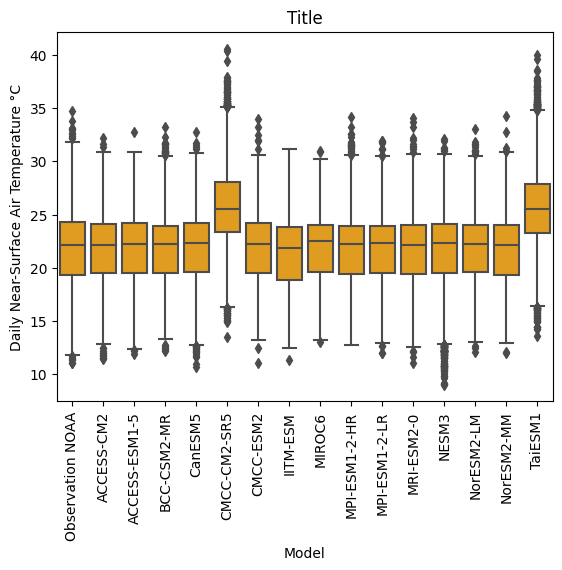

In [152]:
fig,ax=plt.subplots()
#sns.boxplot(data=daily_sum_obs_from_NOAA_gorongosa, x ='NAME',y='TAVG',ax=ax)
cols = ['blue' if (x !='Observation NOAA') else 'orange' for x in list(df_boxplot.Model)]
sns.boxplot(data=df_boxplot,x='Model', y='Daily Near-Surface Air Temperature °C',palette=cols,ax=ax)

# display the legend
#handles, labels=ax.get_legend_handles_labels()
#fig.legend(handles, labels, loc='upper right', ncol=1, bbox_to_anchor=(1.3, 1),title='Legend')
#ax.get_legend().remove() # this line permits to have a common legend for the boxplots and the line
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.title('Title')
plt.show()

In [150]:
list(df_boxplot.Model)

['Observation NOAA',
 'Observation NOAA',
 'Observation NOAA',
 'Observation NOAA',
 'Observation NOAA',
 'Observation NOAA',
 'Observation NOAA',
 'Observation NOAA',
 'Observation NOAA',
 'Observation NOAA',
 'Observation NOAA',
 'Observation NOAA',
 'Observation NOAA',
 'Observation NOAA',
 'Observation NOAA',
 'Observation NOAA',
 'Observation NOAA',
 'Observation NOAA',
 'Observation NOAA',
 'Observation NOAA',
 'Observation NOAA',
 'Observation NOAA',
 'Observation NOAA',
 'Observation NOAA',
 'Observation NOAA',
 'Observation NOAA',
 'Observation NOAA',
 'Observation NOAA',
 'Observation NOAA',
 'Observation NOAA',
 'Observation NOAA',
 'Observation NOAA',
 'Observation NOAA',
 'Observation NOAA',
 'Observation NOAA',
 'Observation NOAA',
 'Observation NOAA',
 'Observation NOAA',
 'Observation NOAA',
 'Observation NOAA',
 'Observation NOAA',
 'Observation NOAA',
 'Observation NOAA',
 'Observation NOAA',
 'Observation NOAA',
 'Observation NOAA',
 'Observation NOAA',
 'Observation

# Create overview of trends (monthly, annual evolution)

In [54]:
# data_1 : first set of data to be used, should only contains the location of interest
# source_1 : source of the first set of data
# data_2 : second set of dat to be used, should only contains the location of interest
# source_2 : source of the second set of data

def trends_month(climate_var,data_1,source_1,data_2,source_2,stats,location,temporal_resolution='Month',start_year_line=1970,stop_year_line=2014,start_year_boxplot=2015,stop_year_boxplot=2060):
    
    (climate_var_longName,unit)= infos_str(climate_var,temporal_resolution)
    
    # define the new common name, that will be used as y_axis for boxplots and line
    new_name_col = temporal_resolution+'ly '+climate_var_longName+' '+unit
    
    if 'NEX-GDDP-CMIP6' in source_1:
        if (start_year_boxplot!=2014) or (stop_year_boxplot!=2060):
            data_1=data_1[data_1['Year'].between(start_year_boxplot,stop_year_boxplot)]
        data_boxplot=prepare_NEX_GDDP_CMIP6(data_1,climate_var_longName,stats,temporal_resolution,new_name_col)
        source_boxplot=source_1
    if 'NEX-GDDP-CMIP6' in source_2:
        if (start_year_boxplot!=2014) or (stop_year_boxplot!=2060):
            data_2=data_2[data_2['Year'].between(start_year_boxplot,stop_year_boxplot)]
        data_boxplot=prepare_NEX_GDDP_CMIP6(data_2,climate_var_longName,stats,temporal_resolution,new_name_col)
        source_boxplot=source_2
    if 'NOAA' in source_1:
        if (start_year_line!=1970) or (stop_year_line!=2014):
            data_1=data_1[data_1['Year'].between(start_year_line,stop_year_line)]
        title_column=title_column_NOAA_obs(source_1,climate_var)
        data_line=prepare_NOAA(data_1,title_column,temporal_resolution,new_name_col)
        source_line=source_1
    if 'NOAA' in source_2:
        if (start_year_line!=1970) or (stop_year_line!=2014):
            data_2=data_2[data_2['Year'].between(start_year_line,stop_year_line)]
        title_column=title_column_NOAA_obs(source_2,climate_var)
        data_line=prepare_NOAA(data_2,title_column,temporal_resolution,new_name_col)
        source_line=source_2
    
    if temporal_resolution == 'Month': # to plot the data in the chronological order of the months
        month_order = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
        data_boxplot=data_boxplot.reset_index().set_index(temporal_resolution).loc[month_order].reset_index()
        data_line=data_line.reset_index().set_index(temporal_resolution).loc[month_order].reset_index()    
    
    if stats == 'Sum':
        title_plot = climate_var_longName+' '+unit+', modeled by '+source_boxplot+',\nbetween '+str(start_year_boxplot)+' and '+str(stop_year_boxplot)+' at '+location+' compared with '+source_line+'\nobservation data, between '+str(start_year_line)+' and '+str(stop_year_line)
    else:
        title_plot = stats+' '+climate_var_longName+' '+unit+', modeled by '+source_boxplot+',\nbetween '+str(start_year_boxplot)+' and '+str(stop_year_boxplot)+' at '+location+' compared with '+source_line+'\nobservation data, between '+str(start_year_line)+' and '+str(stop_year_line)
        
    boxplots_line(data_boxplot,data_line,temporal_resolution,new_name_col,source_line,title_plot)

In [21]:
# select years because impossible to read
def trends_year(climate_var,data_1,source_1,stats,location,start_year,stop_year,temporal_resolution='Year'):
    (climate_var_longName,unit)= infos_str(climate_var,temporal_resolution)
    
    # define the new common name, that will be used as y_axis for boxplots and line
    new_name_col = temporal_resolution+'ly '+climate_var_longName+' '+unit
    
    data_boxplot=prepare_NEX_GDDP_CMIP6(data_1,climate_var_longName,stats,temporal_resolution,new_name_col)
    if stats =='Sum':
        stats = ''
    
    if (stop_year-start_year+1)>10:
        for i in np.arange(0,round(((stop_year-start_year+1)/10))):
            df_filter=data_boxplot[data_boxplot['Year'].between(start_year+i*10,start_year+i*10+10)]
            title_plot = stats+' '+ climate_var_longName+' '+unit+' between '+str(start_year)+' and '+str(stop_year)+' at '+location
            boxplots(df_filter,temporal_resolution,new_name_col,title_plot)
    else:
        df_filter=data_boxplot[data_boxplot['Year'].between(start_year,stop_year)]
        title_plot = stats+' '+climate_var_longName+' '+unit+' between '+str(start_year)+' and '+str(stop_year)+' at '+location
        boxplots(df_filter,temporal_resolution,new_name_col,title_plot)

In [22]:
def prepare_NEX_GDDP_CMIP6(df,climate_var_longName,stats,temporal_resolution,new_name_col):
    try:
        try:
            title_column=df.filter(like=climate_var_longName, axis=1).columns[0]
        except:
            title_column=df.filter(like=climate_var_longName.capitalize(), axis=1).columns[0]
    except:
        title_column=df.filter(like=climate_var_longName.upper(), axis=1).columns[0]
        
    if stats == 'Average':
        data_NEXGDDPCMIP6=df[['Experiment','Model',temporal_resolution,title_column]].groupby(['Experiment','Model',temporal_resolution]).mean().rename(columns={title_column:new_name_col}).reset_index()
    if stats == 'Sum':
        data_NEXGDDPCMIP6=df[['Experiment','Model',temporal_resolution,title_column]].groupby(['Experiment','Model',temporal_resolution]).sum().rename(columns={title_column:new_name_col}).reset_index()
    if stats == 'Median':
        data_NEXGDDPCMIP6=df[['Experiment','Model',temporal_resolution,title_column]].groupby(['Experiment','Model',temporal_resolution]).median().rename(columns={title_column:new_name_col}).reset_index()
    return data_NEXGDDPCMIP6

In [23]:
def prepare_NOAA(df_NOAA,title_column,temporal_resolution,new_name_col):
    df_NOAA = df_NOAA.reset_index()
    df = df_NOAA[[title_column,temporal_resolution]].groupby(temporal_resolution).mean().rename(columns={title_column:new_name_col}).reset_index()
    return df

In [24]:
def infos_str(climate_var,temporal_resolution):
    if climate_var=='pr':
        climate_var_longName = 'precipitation'
        unit='mm/'+temporal_resolution[0].lower()+temporal_resolution[1:len(temporal_resolution)]
    if 'tas' in climate_var:
        unit=u'\N{DEGREE SIGN}C'
        climate_var_longName = 'temperature'
    if climate_var=='tasmax':
        climate_var_longName = 'maximum '+climate_var_longName
    if climate_var=='tasmin':
        climate_var_longName = 'minimum '+climate_var_longName
    return climate_var_longName,unit

In [25]:
def title_column_NOAA_obs(source,climate_var):
    if source == 'NOAA':
        if climate_var=='pr':
            title_column='PRCP'
        if climate_var=='tas':
            title_column='TAVG'
        if climate_var=='tasmax':
            title_column='TMAX'
        if climate_var=='tasmin':
            title_column='TMIN'
        return title_column

In [29]:
# data_boxplot : dataframr that will be used to do the boxplots
# data_line : dataframe that will be used to add a line
# x_axis : Name of the column that wil be used for the x_axis
# y_axis : Name of the column that wil be used for the y_axis
# ----> x_axis and y_axis are both a str, and both should be used as name of colum in the dataframes for the boxplots and 
#       the line
# source_line : name of the source of the data plot in the line
# title_plot : title for this plot. Should be defined in the function before
# categories : default parameters, will be used for the hue of the boxplot. The hue is a third dimension along a depth axis, 
#              where different levels are plotted with different colors

#stats+' monthly precipitation mm/month between '+start_year+' and '+stop_year+'\n with '+source_obs+' observed data and '+source_model+' modeled data, at '+location

def boxplots_line(data_boxplot,data_line,x_axis,y_axis,source_line,title_plot,categories='Experiment'):
    fig,ax=plt.subplots()
    sns.boxplot(data=data_boxplot, x=x_axis, y=y_axis, hue=categories,ax=ax)
    ax.get_legend().remove() # this line permits to have a common legend for the boxplots and the line
    sns.lineplot(data=data_line,x=x_axis, y=y_axis,ax=ax,label=source_line)
    
    # display the common legend for the line and boxplots
    handles, labels=ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper right', ncol=1, bbox_to_anchor=(1.2, 0.5),title='Legend')
    ax.get_legend().remove() # this line permits to have a common legend for the boxplots and the line
    plt.title(title_plot)
    plt.show()
    
# data_boxplot : dataframr that will be used to do the boxplots
# x_axis : Name of the column that wil be used for the x_axis
# y_axis : Name of the column that wil be used for the y_axis
# ----> x_axis and y_axis are both a str
# title_plot : title for this plot. Should be defined in the function before
# categories : default parameters, will be used for the hue of the boxplot. The hue is a third dimension along a depth axis, 
#              where different levels are plotted with different colors

#stats+' monthly precipitation mm/month between '+start_year+' and '+stop_year+'\n with '+source_obs+' observed data and '+source_model+' modeled data, at '+location

def boxplots(data_boxplot,x_axis,y_axis,title_plot,categories='Experiment'):
    fig,ax=plt.subplots()
    sns.boxplot(data=data_boxplot, x=x_axis, y=y_axis, hue=categories,ax=ax)
    
    # display the legend
    handles, labels=ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper right', ncol=1, bbox_to_anchor=(1.1, 0.5),title='Legend')
    ax.get_legend().remove() # this line permits to have a common legend for the boxplots and the line
    plt.title(title_plot)
    plt.show()

In [112]:
def plot_spaghetti(data,x_axis,y_axis,title_plot,have_legend):
    fig,ax=plt.subplots()
    sns.lineplot(data=data,x=x_axis, y=y_axis,ax=ax)
        # display the legend
    if have_legend == 'yes':
        handles, labels=ax.get_legend_handles_labels()
        fig.legend(handles, labels, loc='upper right', ncol=1, bbox_to_anchor=(1.1, 0.5),title='Legend')
    #ax.get_legend().remove() # this line permits to have a common legend for the boxplots and the line
    plt.title(title_plot)
    plt.show()

In [27]:
path = r'C:\Users\CLMRX\COWI\A248363 - Climate analysis - Documents\General\CRVA_tool\Master_thesis\Project\3 - Implementation\1 - Data\1-BC\NOAA-ClimateDataOnline\3370204.csv'
daily_sum_obs_from_NOAA = pd.read_csv(path)
daily_sum_obs_from_NOAA_gorongosa = daily_sum_obs_from_NOAA[daily_sum_obs_from_NOAA['NAME']=='CHIMOIO, MZ']
daily_sum_obs_from_NOAA_gorongosa = add_year_month_season(daily_sum_obs_from_NOAA_gorongosa,'DATE')
daily_sum_obs_from_NOAA_gorongosa

C:\Users\CLMRX\AppData\Local\Temp\1\ipykernel_16504\2835294180.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = Year
C:\Users\CLMRX\AppData\Local\Temp\1\ipykernel_16504\2835294180.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month'] = Month
C:\Users\CLMRX\AppData\Local\Temp\1\ipykernel_16504\2835294180.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP,PRCP_ATTRIBUTES,TAVG,TAVG_ATTRIBUTES,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES,Year,Month,Season
3019,MZ000067295,"CHIMOIO, MZ",-19.117,33.467,732.0,1970-01-01,0.4,",,Q",NaN,NaN,30.0,",,Q",20.7,",,Q",1970,Jan,Humid
3020,MZ000067295,"CHIMOIO, MZ",-19.117,33.467,732.0,1970-01-02,0.0,",,Q",NaN,NaN,30.5,",,Q",21.2,",,Q",1970,Jan,Humid
3021,MZ000067295,"CHIMOIO, MZ",-19.117,33.467,732.0,1970-01-03,0.0,",,Q",NaN,NaN,28.7,",,Q",20.5,",,Q",1970,Jan,Humid
3022,MZ000067295,"CHIMOIO, MZ",-19.117,33.467,732.0,1970-01-04,0.0,",,Q",NaN,NaN,28.8,",,Q",19.2,",,Q",1970,Jan,Humid
3023,MZ000067295,"CHIMOIO, MZ",-19.117,33.467,732.0,1970-01-05,0.0,",,Q",NaN,NaN,30.1,",,Q",20.2,",,Q",1970,Jan,Humid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16615,MZ000067295,"CHIMOIO, MZ",-19.117,33.467,732.0,2020-12-27,NaN,NaN,25.3,"H,,S",NaN,NaN,21.2,",,S",2020,Dec,Humid
16616,MZ000067295,"CHIMOIO, MZ",-19.117,33.467,732.0,2020-12-28,NaN,NaN,26.4,"H,,S",NaN,NaN,21.3,",,S",2020,Dec,Humid
16617,MZ000067295,"CHIMOIO, MZ",-19.117,33.467,732.0,2020-12-29,NaN,NaN,25.9,"H,,S",NaN,NaN,NaN,NaN,2020,Dec,Humid
16618,MZ000067295,"CHIMOIO, MZ",-19.117,33.467,732.0,2020-12-30,7.1,",,S",22.8,"H,,S",NaN,NaN,21.0,",,S",2020,Dec,Humid


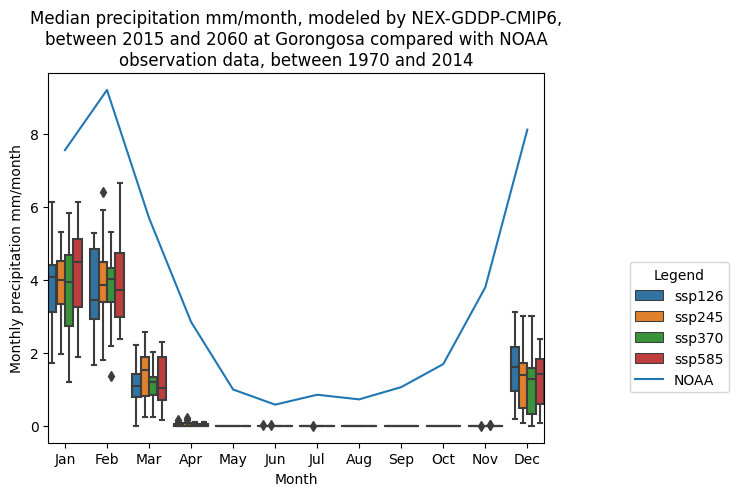

In [57]:
trends_month('pr',pr_futur_model_NEXGDDPCMIP6_gorongosa,'NEX-GDDP-CMIP6',daily_sum_obs_from_NOAA_gorongosa,'NOAA','Median','Gorongosa')

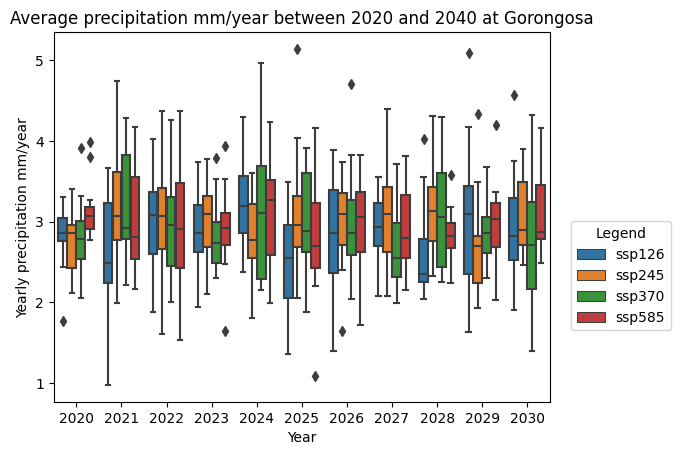

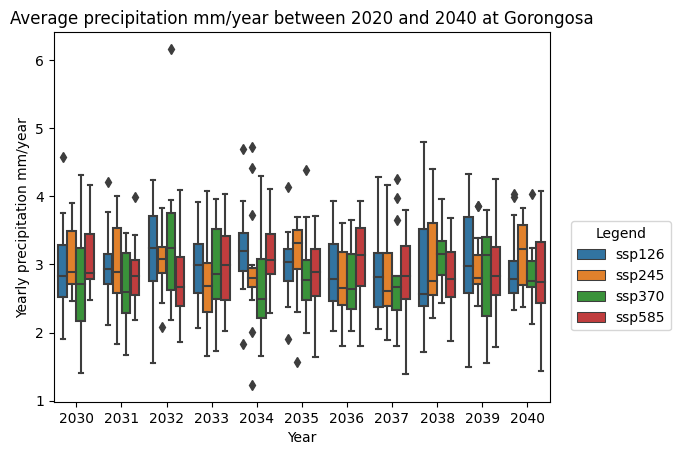

In [39]:
trends_year('pr',pr_futur_model_NEXGDDPCMIP6_gorongosa,'NEX-GDDP-CMIP6','Average','Gorongosa',2020,2040)

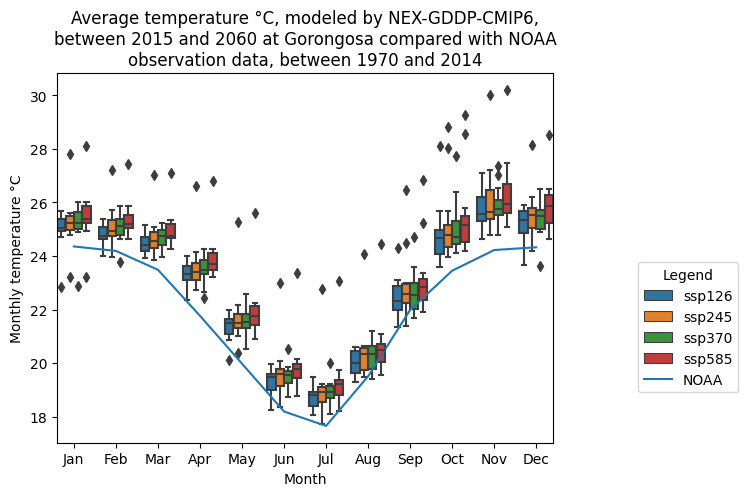

In [62]:
trends_month('tas',tas_wrong_future_modeled_NEXGDDPCMIP6[tas_wrong_future_modeled_NEXGDDPCMIP6['Name project']=='Gorongosa_EIB'],'NEX-GDDP-CMIP6',daily_sum_obs_from_NOAA_gorongosa,'NOAA','Average','Gorongosa')

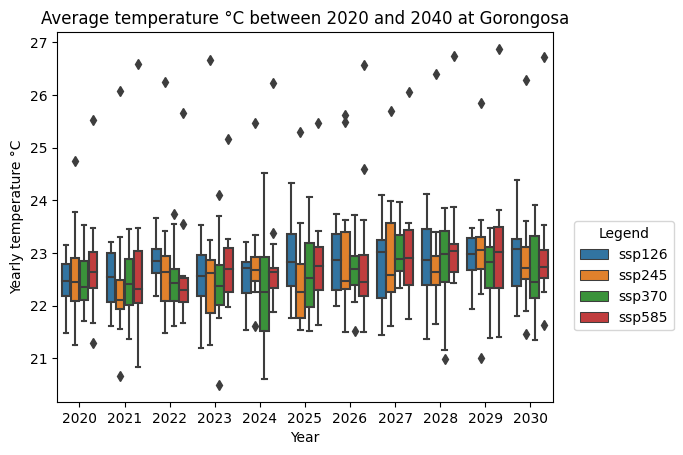

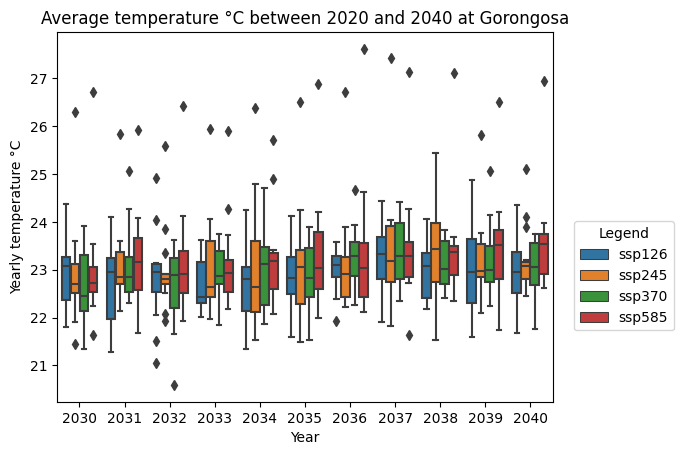

In [61]:
trends_year('tas',tas_wrong_future_modeled_NEXGDDPCMIP6[tas_wrong_future_modeled_NEXGDDPCMIP6['Name project']=='Gorongosa_EIB'],'NEX-GDDP-CMIP6','Average','Gorongosa',2020,2040)

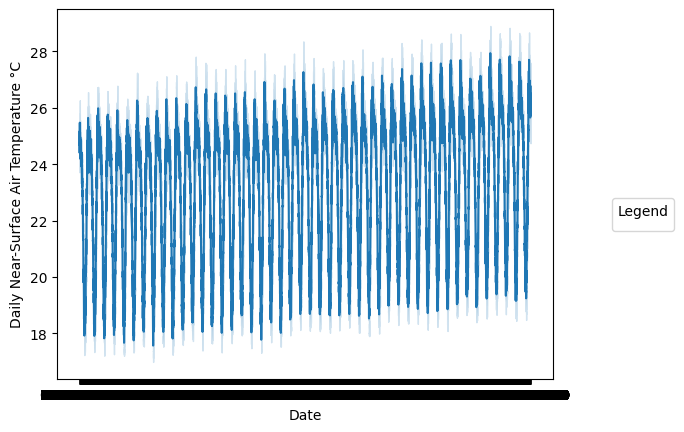

In [67]:
plot_spaghetti(tas_wrong_future_modeled_NEXGDDPCMIP6[tas_wrong_future_modeled_NEXGDDPCMIP6['Name project']=='Gorongosa_EIB'],'Date','Daily Near-Surface Air Temperature °C')

In [96]:
tas_wrong_future_modeled_NEXGDDPCMIP6_gorongosa=tas_wrong_future_modeled_NEXGDDPCMIP6[tas_wrong_future_modeled_NEXGDDPCMIP6['Name project']=='Gorongosa_EIB'].drop(['Name project','Latitude','Longitude'],axis=1).groupby(['Experiment','Model','Year'])[['Daily Near-Surface Air Temperature °C']].mean().reset_index()

In [97]:
tas_wrong_future_modeled_NEXGDDPCMIP6_gorongosa

,Experiment,Model,Year,Daily Near-Surface Air Temperature °C
0,ssp126,ACCESS-CM2,2015,22.496570
1,ssp126,ACCESS-CM2,2016,22.733785
2,ssp126,ACCESS-CM2,2017,22.121428
3,ssp126,ACCESS-CM2,2018,22.634697
4,ssp126,ACCESS-CM2,2019,22.707534
...,...,...,...,...
2755,ssp585,TaiESM1,2056,25.872408
2756,ssp585,TaiESM1,2057,24.320467
2757,ssp585,TaiESM1,2058,24.451489
2758,ssp585,TaiESM1,2059,27.082683


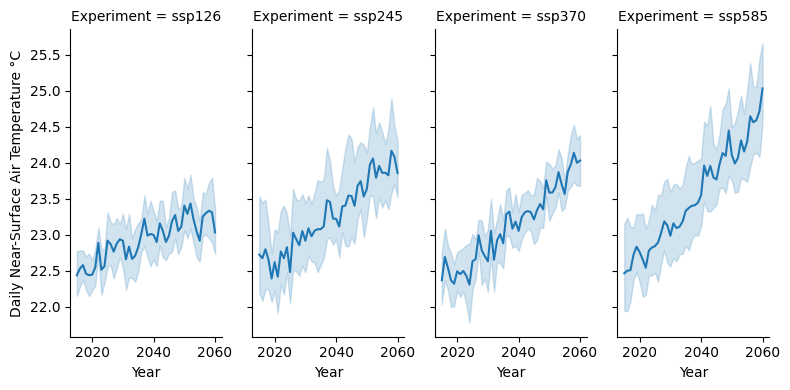

In [99]:
g = sns.FacetGrid(tas_wrong_future_modeled_NEXGDDPCMIP6_gorongosa, col="Experiment", height=4, aspect=.5)
g.map(sns.lineplot, "Year",'Daily Near-Surface Air Temperature °C')

In [101]:
tas_wrong_future_modeled_NEXGDDPCMIP6_gorongosa_overMandS=tas_wrong_future_modeled_NEXGDDPCMIP6[tas_wrong_future_modeled_NEXGDDPCMIP6['Name project']=='Gorongosa_EIB'].drop(['Name project','Latitude','Longitude'],axis=1).groupby(['Year'])[['Daily Near-Surface Air Temperature °C']].mean().reset_index()

<Axes: xlabel='Year', ylabel='Daily Near-Surface Air Temperature °C'>

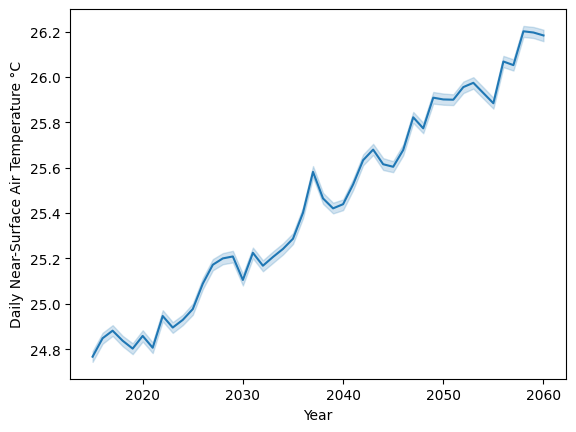

In [104]:
sns.lineplot(tas_wrong_future_modeled_NEXGDDPCMIP6,x='Year',y='Daily Near-Surface Air Temperature °C')

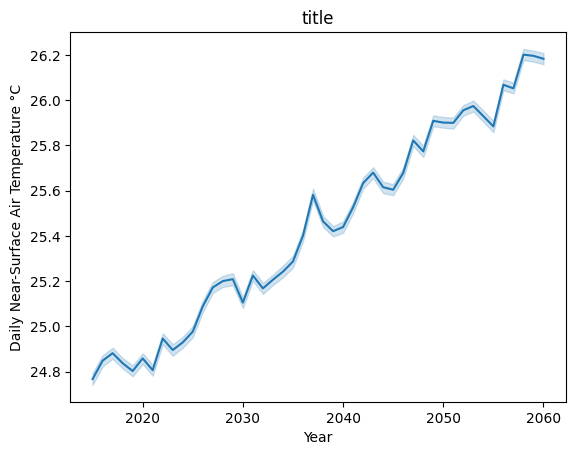

In [113]:
plot_spaghetti(tas_wrong_future_modeled_NEXGDDPCMIP6,'Year','Daily Near-Surface Air Temperature °C','title','No')